In [98]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics

In [99]:
#Loading the data from excel to pandas 
cars_data = pd.read_excel("/Users/ataberkcinetci/Desktop/ProjectX/Data/asg1_traindata.xlsx")

In [100]:
#inspecting first 5 datas
cars_data.head()

,Price,Year,Type,Shift,km,Power,Engine,Seller
0,24900,2004,Diesel,Manual,270000,70,1248,Dealer
1,27500,2004,Gasoline,Manual,164000,75,1199,Dealer
2,42500,2008,Diesel,Auto,300000,90,1248,Dealer
3,63750,2017,Gasoline,Auto,8780,90,1398,Dealer
4,25000,2004,Diesel,Manual,200000,70,1248,Owner


In [101]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2900 non-null   int64 
 1   Year    2900 non-null   int64 
 2   Type    2900 non-null   object
 3   Shift   2900 non-null   object
 4   km      2900 non-null   int64 
 5   Power   2900 non-null   int64 
 6   Engine  2900 non-null   int64 
 7   Seller  2900 non-null   object
dtypes: int64(5), object(3)
memory usage: 181.4+ KB


In [102]:
cars_data.shape

(2900, 8)

In [103]:
#Checking the number of missing values
cars_data.isnull().sum()

Price     0
Year      0
Type      0
Shift     0
km        0
Power     0
Engine    0
Seller    0
dtype: int64

In [104]:
#checking the distrubition of categorical data 
print(cars_data.Type.value_counts())
print(cars_data.Shift.value_counts())
print(cars_data.Seller.value_counts())

Gasoline    1133
Diesel      1113
LPG          654
Name: Type, dtype: int64
Manual    1951
Auto       949
Name: Shift, dtype: int64
Owner     1635
Dealer    1265
Name: Seller, dtype: int64


# Encoding the categorical datas 

In [105]:
#encoding "Type"
cars_data.replace({"Type":{"Gasoline": 0,"Diesel":1, "LPG": 2}},inplace = True)

In [106]:
#encoding "Shift"
cars_data.replace({"Shift":{"Manual": 0,"Auto":1}},inplace=True)

In [107]:
#Encoding "Seller"
cars_data.replace({"Seller":{"Owner": 0,"Dealer":1}},inplace=True)

In [108]:
#Splitting data in to 2 parts: DATA and TARGET
X=cars_data.drop(["Price"],axis=1)
Y=cars_data["Price"]

In [109]:
# Splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,) 

# Model Training

In [110]:
#Linear Regression Model

In [111]:
lr = LinearRegression()

In [112]:
lr.fit(X_train,Y_train)

LinearRegression()

In [113]:
train_data_prediction = lr.predict(X_train)

In [114]:
# r^2 error for train
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("r^2 error is", error_score)

r^2 error is 0.8633968140807112


In [ ]:
# r^2 error for test data
test_data_prediction = lr.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("r^2 error is", error_score)

# Visualize the actual ad predicted prices

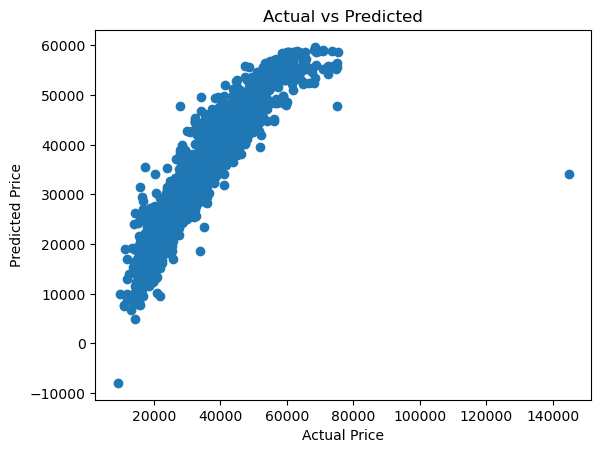

In [115]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

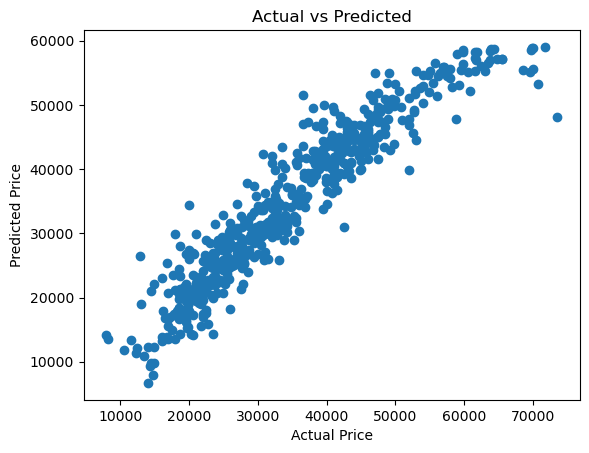

In [117]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()